In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
DATA_FOLDER = 'data/'
assay = pd.read_csv(f'{DATA_FOLDER}BS_assay.csv')
block_model = pd.read_csv(f'{DATA_FOLDER}BS_block_model.csv')
collar = pd.read_csv(f'{DATA_FOLDER}BS_collar.csv')
old_lith = pd.read_csv(f'{DATA_FOLDER}BS_old_lith.csv')
relog_geo = pd.read_csv(f'{DATA_FOLDER}BS_relog_geology.csv')
survey = pd.read_csv(f'{DATA_FOLDER}BS_survey.csv')

In [17]:
len(assay.HOLEID.unique())

194

In [18]:
print(len(assay), len(block_model), len(collar), len(old_lith), len(relog_geo), len(survey))

10527 404919 234 40845 221 937


In [19]:
assay.head(1)

,HOLEID,SAMPFROM,SAMPTO,AG_PPM_OLDISKUT,AS_PPM_OLDISKUT,AU_PPM_OLDISKUT,BA_PPM_OLDISKUT,BI_PPM_OLDISKUT,CD_PPM_OLDISKUT,CO_PPM_OLDISKUT,...,K_PCT_OLDISKUT,MO_PCT_OLDISKUT,NA_PCT_OLDISKUT,PB_PCT_OLDISKUT,S_PCT_OLDISKUT,SB_PPM_OLDISKUT,Comment,Veins,Snip_Veins,Snip_veins_sorted
0,1198,3.0,8.0,2.6,NaN,0.375,NaN,NaN,NaN,NaN,...,NaN,0.006,NaN,NaN,NaN,NaN,NaN,NaN,High,High


In [20]:
print(assay.isna().any())

HOLEID               False
SAMPFROM              True
SAMPTO                True
AG_PPM_OLDISKUT       True
AS_PPM_OLDISKUT       True
AU_PPM_OLDISKUT      False
BA_PPM_OLDISKUT       True
BI_PPM_OLDISKUT       True
CD_PPM_OLDISKUT       True
CO_PPM_OLDISKUT       True
CR_PPM_OLDISKUT       True
CU_PCT_OLDISKUT       True
FE_PCT_OLDISKUT       True
K_PCT_OLDISKUT        True
MO_PCT_OLDISKUT       True
NA_PCT_OLDISKUT       True
PB_PCT_OLDISKUT       True
S_PCT_OLDISKUT        True
SB_PPM_OLDISKUT       True
Comment               True
Veins                 True
Snip_Veins            True
Snip_veins_sorted     True
dtype: bool


In [21]:
assay[assay.SAMPFROM.isna()]

,HOLEID,SAMPFROM,SAMPTO,AG_PPM_OLDISKUT,AS_PPM_OLDISKUT,AU_PPM_OLDISKUT,BA_PPM_OLDISKUT,BI_PPM_OLDISKUT,CD_PPM_OLDISKUT,CO_PPM_OLDISKUT,...,K_PCT_OLDISKUT,MO_PCT_OLDISKUT,NA_PCT_OLDISKUT,PB_PCT_OLDISKUT,S_PCT_OLDISKUT,SB_PPM_OLDISKUT,Comment,Veins,Snip_Veins,Snip_veins_sorted
10500,UG21-212,NaN,NaN,NaN,NaN,NSA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Aug 2021 drilling,NaN,NaN,NaN
10526,UG21-217,NaN,NaN,NaN,NaN,NSA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Aug 2021 drilling,NaN,NaN,NaN


In [22]:
assay.columns

Index(['HOLEID', 'SAMPFROM', 'SAMPTO', 'AG_PPM_OLDISKUT', 'AS_PPM_OLDISKUT',
       'AU_PPM_OLDISKUT', 'BA_PPM_OLDISKUT', 'BI_PPM_OLDISKUT',
       'CD_PPM_OLDISKUT', 'CO_PPM_OLDISKUT', 'CR_PPM_OLDISKUT',
       'CU_PCT_OLDISKUT', 'FE_PCT_OLDISKUT', 'K_PCT_OLDISKUT',
       'MO_PCT_OLDISKUT', 'NA_PCT_OLDISKUT', 'PB_PCT_OLDISKUT',
       'S_PCT_OLDISKUT', 'SB_PPM_OLDISKUT', 'Comment', 'Veins', 'Snip_Veins',
       'Snip_veins_sorted'],
      dtype='object')

In [23]:
clean_assay = assay[pd.to_numeric(assay['AU_PPM_OLDISKUT'], errors='coerce').notnull()]

clean_assay.AU_PPM_OLDISKUT = clean_assay.AU_PPM_OLDISKUT.astype(float)
clean_assay.dtypes

/var/folders/4h/m6_qv78d1ll6g0_5dn81rvh80000gp/T/ipykernel_41894/255133603.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_assay.AU_PPM_OLDISKUT = clean_assay.AU_PPM_OLDISKUT.astype(float)


HOLEID                object
SAMPFROM             float64
SAMPTO               float64
AG_PPM_OLDISKUT      float64
AS_PPM_OLDISKUT      float64
AU_PPM_OLDISKUT      float64
BA_PPM_OLDISKUT      float64
BI_PPM_OLDISKUT      float64
CD_PPM_OLDISKUT      float64
CO_PPM_OLDISKUT      float64
CR_PPM_OLDISKUT      float64
CU_PCT_OLDISKUT      float64
FE_PCT_OLDISKUT      float64
K_PCT_OLDISKUT       float64
MO_PCT_OLDISKUT      float64
NA_PCT_OLDISKUT      float64
PB_PCT_OLDISKUT      float64
S_PCT_OLDISKUT       float64
SB_PPM_OLDISKUT      float64
Comment               object
Veins                float64
Snip_Veins            object
Snip_veins_sorted     object
dtype: object

/var/folders/4h/m6_qv78d1ll6g0_5dn81rvh80000gp/T/ipykernel_41894/2331897480.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


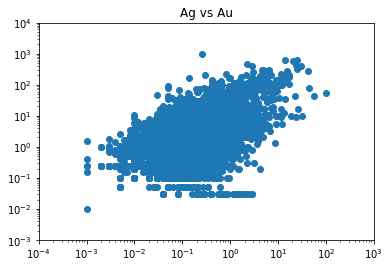

In [24]:
fig, ax = plt.subplots()

x = clean_assay.AU_PPM_OLDISKUT
ys = [clean_assay.AG_PPM_OLDISKUT]

for y in ys:
    ax.scatter(x, y)
    
    
ax.set_title("Ag vs Au")
ax.set_xlim(0.0001, 1000)
ax.set_xscale("log")
ax.set_ylim(0.001, 10000)
ax.set_yscale("log")

fig.show()

In [25]:
# First, get the data
assay = pd.read_csv(f'{DATA_FOLDER}BS_assay.csv')  # here is the assay data

In [29]:
# Then clean the data
clean_assay = assay[pd.to_numeric(assay['AU_PPM_OLDISKUT'], errors='coerce').notnull()]

clean_assay.AU_PPM_OLDISKUT = clean_assay.AU_PPM_OLDISKUT.astype(float)
print(clean_assay.dtypes)
# Hopefully all the things that we want to keep numerical are now numerical

assay = clean_assay

HOLEID                object
SAMPFROM             float64
SAMPTO               float64
AG_PPM_OLDISKUT      float64
AS_PPM_OLDISKUT      float64
AU_PPM_OLDISKUT      float64
BA_PPM_OLDISKUT      float64
BI_PPM_OLDISKUT      float64
CD_PPM_OLDISKUT      float64
CO_PPM_OLDISKUT      float64
CR_PPM_OLDISKUT      float64
CU_PCT_OLDISKUT      float64
FE_PCT_OLDISKUT      float64
K_PCT_OLDISKUT       float64
MO_PCT_OLDISKUT      float64
NA_PCT_OLDISKUT      float64
PB_PCT_OLDISKUT      float64
S_PCT_OLDISKUT       float64
SB_PPM_OLDISKUT      float64
Comment               object
Veins                float64
Snip_Veins            object
Snip_veins_sorted     object
dtype: object


/var/folders/4h/m6_qv78d1ll6g0_5dn81rvh80000gp/T/ipykernel_41894/3644922165.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_assay.AU_PPM_OLDISKUT = clean_assay.AU_PPM_OLDISKUT.astype(float)


In [59]:
class Metal:
    def __init__(self, metal_id: str, weights: list, grades: list):
        data = {
            "weight": weights,
            "grade": grades
        }
        self.info = df = pd.DataFrame(data)
        df.sort_values(by='grade', ascending=False, inplace=True)
        df['cml_weight'] = df['weight'].cumsum()
        
        sum_weights = sum(df['weight'])
        df['weight_pct'] = np.divide(df['weight'], sum_weights)
        df['cml_weight_pct'] = df['weight_pct'].cumsum()
        df['yield'] = np.multiply(df['weight'], df['grade'])
        df['cml_yield'] = df['yield'].cumsum()
        df['cml_grade'] = np.divide(df['cml_yield'], df['cml_weight'])
        
        sum_yield = sum(df['yield'])
        df['recovery'] = np.divide(df['yield'], sum_yield)
        df['cml_recovery'] = df['recovery'].cumsum()
        

class DrillHole:
    def __init__(self, hole_id):
        self.hole_id = hole_id
        self.metals = {}
        
    def calculate_metal_heterogeneity(self, metal_id: str, weights: list, grades: list):
        if len(weights) - len(grades) == 0:
            self.metals[metal_id] = Metal(metal_id, weights, grades)
        else:
            raise Exception("Weight and grade arrays must be same length")

In [83]:
# Sort the data into drillholes
hole_ids = assay.HOLEID.unique()

resources = {
    "Cu": "CU_PCT_OLDISKUT",
    "Au": "AU_PPM_OLDISKUT"
}

# currently creating a dictionary with the DataFrame queries, but we can create an object instead
drillholes = {}
for hole_id in hole_ids:
    dh = drillholes[hole_id] = DrillHole(hole_id)
    df = assay.query("HOLEID == @hole_id")
    weights = list(np.subtract(df.SAMPTO, df.SAMPFROM))
    
    for resource_id, column_id in resources.items():
        grades = df[column_id].to_list()
        dh.calculate_metal_heterogeneity(resource_id, weights, grades)

# Calculate constitutional heterogeneity, and distributional heterogeneity

In [84]:
drillholes["1198"].metals["Cu"].info.head(5)

,weight,grade,cml_weight,weight_pct,cml_weight_pct,yield,cml_yield,cml_grade,recovery,cml_recovery
3,2.0,0.368,2.0,0.030075,0.030075,0.7360,0.7360,0.368000,0.062486,0.062486
16,2.5,0.311,4.5,0.037594,0.067669,0.7775,1.5135,0.336333,0.066010,0.128496
8,5.0,0.281,9.5,0.075188,0.142857,1.4050,2.9185,0.307211,0.119284,0.247780
15,2.5,0.281,12.0,0.037594,0.180451,0.7025,3.6210,0.301750,0.059642,0.307422
6,3.5,0.227,15.5,0.052632,0.233083,0.7945,4.4155,0.284871,0.067453,0.374875


/var/folders/4h/m6_qv78d1ll6g0_5dn81rvh80000gp/T/ipykernel_41894/4012580228.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/4h/m6_qv78d1ll6g0_5dn81rvh80000gp/T/ipykernel_41894/4012580228.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


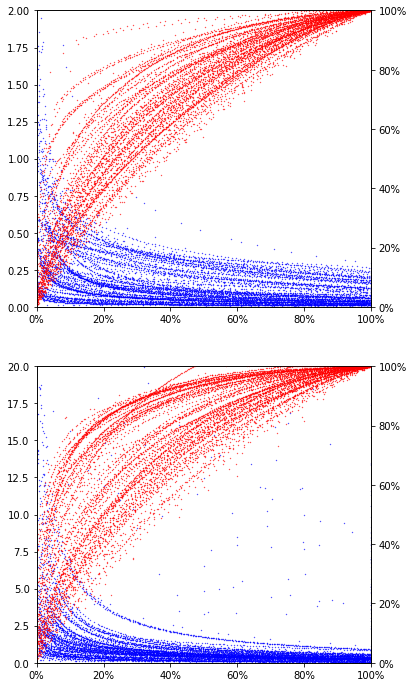

In [88]:
import matplotlib.ticker as mtick

fig, axs = plt.subplots(len(resources), figsize=(6, 6 * len(resources)))

for i, resource_id in enumerate(resources.keys()):
    ax = axs[i]
    ax_sec = ax.twinx()
    for dh_id in drillholes.keys():
        df = drillholes[dh_id].metals[resource_id].info

        x = df['cml_weight_pct']
        y = df['cml_grade']
        ax.scatter(x, y, color='blue', s=0.1)
        
        y = df['cml_recovery']
        ax_sec.scatter(x, y, color='red', s=0.1)
        
    if resource_id == "Cu":
        ax.set_ylim(0, 2)
    elif resource_id == "Au":
        ax.set_ylim(0, 20)
        
    ax.set_xlim(0, 1)
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    
    ax_sec.set_ylim(0, 1)
    ax_sec.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

fig.show()

# fig, axs = plt.subplots(6, 6 * len(resources))


# x = clean_assay.AU_PPM_OLDISKUT
# y = [clean_assay.AU_PPM_OLDISKUT]

# for y in ys:
#     ax.scatter(x, y)
    
    


    
# ax.set_title("Ag vs Au")
# ax.set_xlim(0.0001, 1000)
# ax.set_xscale("log")
# ax.set_ylim(0.001, 10000)
# ax.set_yscale("log")

fig.show()